# Homework 2 Problem 3


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

%matplotlib inline

In [87]:
train = pd.read_csv('C:/Users/hetul/Downloads/assignment 2/train.csv')
test = pd.read_csv('C:/Users/hetul/Downloads/assignment 2/test.csv')
train1 = pd.read_csv('C:/Users/hetul/Downloads/assignment 2/train.csv')
test1 = pd.read_csv('C:/Users/hetul/Downloads/assignment 2/test.csv')
test1['SalePrice'] = np.nan
new_dataset = pd.concat([train1,test1],axis=0)

### Transformation on the respones variable SalePrice
Let's check the distribution of the response variable SalePrice
It seems not very normal distributed, what can we do about it??
Please apply the log transformation on the price and plot the distribution of the sale price, is it more normal?

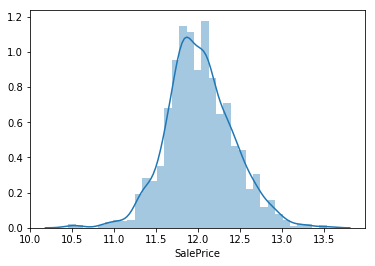

In [88]:
#sns.distplot(train['SalePrice']);
# Fill in your code for transformation
Train = dummies1[pd.notnull(dummies1['SalePrice'])]
log_var = (np.log(Train['SalePrice']))
sns.distplot(log_var);

### Preprocessing: Deal with the missing data (NA) and create dummy variable for categorical variables

Please use the mean of the training data to fit in the NA in both training and testing data set. Please also create dummy variables for all the text dataset.

In [89]:
dummies1 = pd.get_dummies(new_dataset)
Train = dummies1[pd.notnull(dummies1['SalePrice'])]
Test = dummies1[pd.isnull(dummies1['SalePrice'])]
Test_X = Test.drop(['SalePrice'],axis = 1)
Train_1 = Train.fillna(Train.mean())
Test_X1 = Test_X.fillna(Test_X.mean())
Train_X1 = Train_1.drop(['SalePrice'],axis = 1)
Train_Y1 = Train_1[['SalePrice']]

### Model 1: Use Ridge regression and select the best tuning parameter 
- Please plot the cross-validation error for different tuning parameters
- Choose the best tuning paramter using cross-validation


the Minimin value of the error value is: 1022858854.5353096


Text(0.5,1,'Variation of the error\n with respect to alpha values(tuning parameter)')

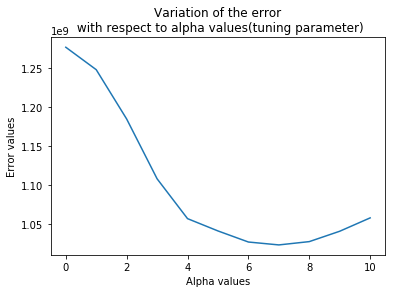

In [74]:

from sklearn.linear_model import Ridge, RidgeCV, LassoCV, LassoLarsCV, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error
alpha = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
ridge = Ridge()

cv_error = []


for a in alpha:
    ridge.set_params(alpha = a)
    ridge.fit(Train_X1, Train_Y1)
    cv_error.append(cross_val_score(ridge, Train_X1, Train_Y1, cv = 10, scoring='neg_mean_squared_error').mean())

cv_error_final = [x * -1 for x in cv_error]
#print(cv_error_final)
print("the Minimin value of the error value is:",min(cv_error_final))

plt.plot(cv_error_final)
plt.ylabel("Error values")
plt.xlabel("Alpha values")
plt.title("Variation of the error\n with respect to alpha values(tuning parameter)")

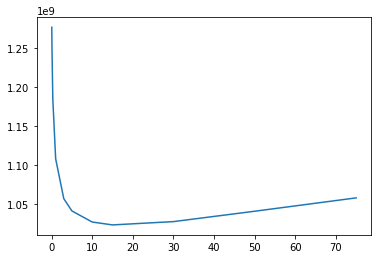

In [9]:
plt.plot(alpha,cv_error_final)

In [79]:
ridgecv = RidgeCV(alphas=alphas, scoring='mean_squared_error')
ridgecv.fit(Train_X1, Train_Y1)

print(ridgecv.alpha_)

15.0


C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\hetul\Anaconda3\lib\sit

### Model 2: Use Lasso regression and select the best tuning parameter 
- Please plot the cross-validation error for different tuning parameters
- Choose the best tuning paramter using cross-validation


In [80]:
alpha = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
lasso = Lasso(max_iter=10)

cv_error1 = []


for a in alpha:
    lasso.set_params(alpha = a)
    lasso.fit(Train_X1, Train_Y1)
    cv_error1.append(cross_val_score(lasso, Train_X1, Train_Y1, cv = 10,scoring='neg_mean_squared_error').mean())

print(cv_error1)
cv_error_final1 = [x * -1 for x in cv_error1]
print(cv_error_final1)


C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

[-1547166126.2736843, -1546432624.2014937, -1543267711.3364587, -1532929497.5742931, -1505865775.0141587, -1485288391.368213, -1444416698.5454214, -1408831703.3522258, -1320094404.548353, -1246171058.641749, -1189398282.947384]
[1547166126.2736843, 1546432624.2014937, 1543267711.3364587, 1532929497.5742931, 1505865775.0141587, 1485288391.368213, 1444416698.5454214, 1408831703.3522258, 1320094404.548353, 1246171058.641749, 1189398282.947384]


C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hetul\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

Text(0.5,1,'Cv Error vs Alpha values')

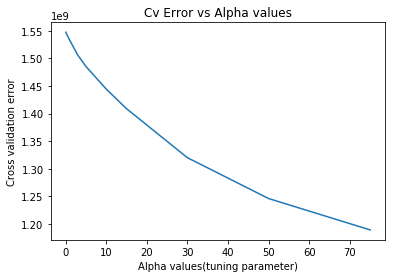

In [65]:
plt.plot(alpha,cv_error_final1)
plt.ylabel("Cross validation error")
plt.xlabel("Alpha values(tuning parameter)")
plt.title("Cv Error vs Alpha values")

In [90]:
#Prediction for ridge method
ridge2=Ridge()
ridge2.set_params(alpha=15)
ridge2.fit(Train_X1, Train_Y1)
predridge = ridge2.predict(Test_X1)

In [91]:
predridge

array([[103135.73652034],
       [145213.25579652],
       [174828.74203761],
       ...,
       [154981.79289185],
       [104259.89024762],
       [226282.35987252]])

In [94]:
#Prediction for lasso method
lasso2=Lasso()
lasso2.set_params(alpha=75)
lasso2.fit(Train_X1, Train_Y1)
predlasso = lasso2.predict(Test_X1)

In [95]:
predlasso

array([115224.73575392, 148466.9960682 , 182143.32199918, ...,
       165492.84492149, 108701.65762168, 221164.1988029 ])